## Kaggle Competition Notebook

### Author : Engr Talha Toqeer
### Linkedin : https://www.linkedin.com/in/muhammad-talha-toqeer-600394212/
### Github : https://github.com/Talha336


## Survival Rate Predicted by Nueral Network in Tensor Flow

In [24]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf


In [25]:
# load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('train.csv')
submission = pd.read_csv('gender_submission.csv')



In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Let's explore the Train Data Set

In [29]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
import warnings

warnings.filterwarnings("ignore")

# Impute missing values in the 'Age' column using the median
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# Impute missing values in the 'Embarked' column using the mode
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

# Impute missing values in the 'Cabin' column with 'Unknown'
df_train['Cabin'].fillna('Unknown', inplace=True)

In [32]:
df = df_train

In [33]:
# Split the data into X and y

X = df.drop(['Survived','Name'],axis=1)
y = df['Survived']


In [34]:
# Encode the data
from sklearn.preprocessing import LabelEncoder

encode_data = LabelEncoder()


# Encode each column in the dataframe
for column in df.columns:
    df[column] = encode_data.fit_transform(df[column])




In [35]:
# Split the data into X and y

X = df.drop(['Survived','Name'],axis=1)
y = df['Survived']


In [36]:
# Train Test Split of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [37]:
# Create a Neural Network for Binary Classificaion

# Create the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=X_train.shape[1], activation='relu'), # Input Layer
    tf.keras.layers.Dense(8, activation='relu'), # Hidden Layer
    tf.keras.layers.Dense(1, activation='sigmoid') # Output Layer
])



In [38]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict on the test set
y_pred = model.predict(X_test)

# predicted values
y_pred

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3945 - loss: 52.2472 - val_accuracy: 0.6224 - val_loss: 4.7938
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5666 - loss: 4.0973 - val_accuracy: 0.6783 - val_loss: 2.9541
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6044 - loss: 3.2236 - val_accuracy: 0.6713 - val_loss: 2.2974
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6095 - loss: 2.3362 - val_accuracy: 0.6364 - val_loss: 1.7051
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6162 - loss: 1.8229 - val_accuracy: 0.6294 - val_loss: 1.5972
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6672 - loss: 1.7117 - val_accuracy: 0.6224 - val_loss: 1.4727
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6282 - loss: 1.5198 - val_accuracy: 0.6364 - val_loss: 1.4345
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6295 - loss: 1.2693 - val_accuracy: 0.6503 - val_loss

array([[4.0187329e-01],
       [5.9397882e-01],
       [4.2239228e-01],
       [9.7412854e-01],
       [8.4504408e-01],
       [6.7587119e-01],
       [8.8740778e-01],
       [2.7374008e-01],
       [4.4998133e-01],
       [5.7021374e-01],
       [3.9962474e-01],
       [1.4658107e-01],
       [4.0600568e-01],
       [2.1238352e-01],
       [2.3714244e-01],
       [8.5159749e-01],
       [5.6627834e-01],
       [5.7392305e-01],
       [7.6996398e-01],
       [7.6209955e-02],
       [2.8380901e-01],
       [5.9683180e-01],
       [2.7920988e-01],
       [4.0277818e-01],
       [3.9952746e-01],
       [3.4600353e-01],
       [1.6268196e-02],
       [4.0662661e-01],
       [6.8965340e-01],
       [4.0950742e-01],
       [3.7147701e-01],
       [3.4291077e-01],
       [6.6509181e-01],
       [3.4101585e-01],
       [2.0641327e-01],
       [3.4493738e-01],
       [9.9877632e-01],
       [3.0183008e-01],
       [9.8703307e-01],
       [2.4714415e-01],
       [7.8943050e-01],
       [1.443788

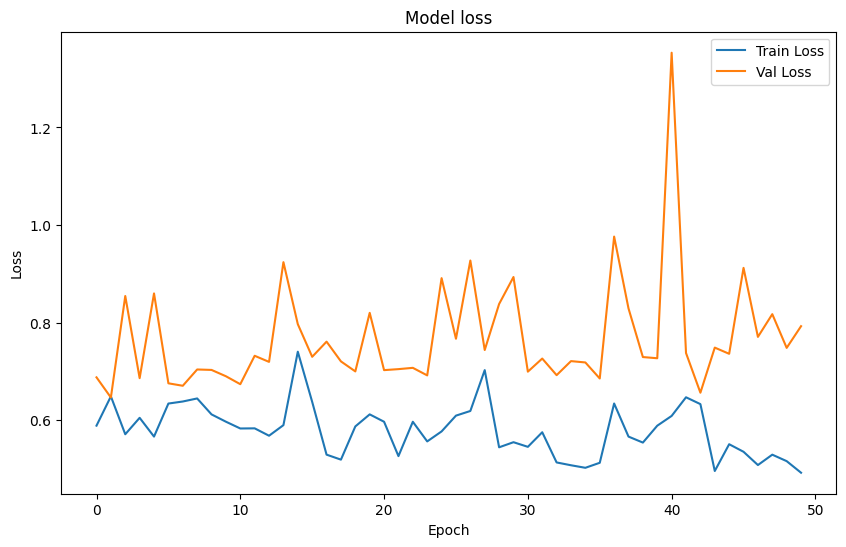

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 0.6087 
Test Accuracy: 0.70


In [39]:
# Train the model and capture history
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')